In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [8]:
os.getcwd()
os.chdir(r'C:\Users\sherw\OneDrive\Desktop\CV_HW5')

In [9]:
plt.style.use(['dark_background'])
plt.rcParams['figure.figsize'] = (2*6.4,2*4.8)

In [10]:
def rgb(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
def gray(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

cap = cv2.VideoCapture('videoplayback.mp4')
fps = int(cap.get(cv2.CAP_PROP_FPS))
n_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
first_frame = 101
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

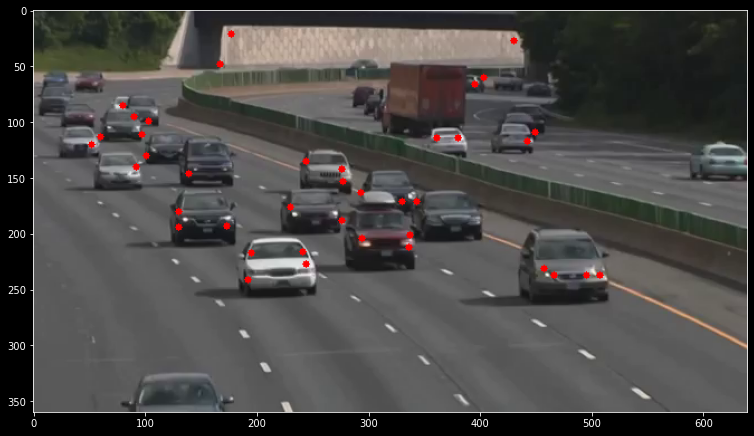

In [11]:
def find_corners(frame, maxCorners = 40, qualityLevel = 0.01, minDistance = 10, blockSize = 19):
    feature_params = dict(maxCorners = maxCorners,
                          qualityLevel = qualityLevel,
                          minDistance = minDistance,
                          blockSize = blockSize)
    corners = cv2.goodFeaturesToTrack(frame,mask=None, **feature_params)
    return corners

cap = cv2.VideoCapture('videoplayback.mp4')
cap.set(1, first_frame)
ret, prev_frame = cap.read()
prev_gray = gray(prev_frame)

corners = find_corners(prev_gray)
for i in corners: 
    x, y = i.ravel() 
    cv2.circle(prev_frame, (x,y), 3, (0, 0, 255), -1) 
plt.imshow(rgb(prev_frame))


In [254]:
# for i in range(101,int(n_frames)):
#     if i<= 448:
#         cap.set(1, i)
#         plt.imshow(cap.read()[1])
#         plt.title(i)
#         plt.show()

In [215]:
 #101-290  #291-447

In [273]:
cap = cv2.VideoCapture('videoplayback.mp4')
cap.set(1, first_frame)
frame_count=0
ret, prev_frame = cap.read()
prev_gray = gray(prev_frame)

In [274]:
def find_corners(frame, maxCorners = 40, qualityLevel = 0.01, minDistance = 10, blockSize = 19):
    feature_params = dict(maxCorners = maxCorners,
                          qualityLevel = qualityLevel,
                          minDistance = minDistance,
                          blockSize = blockSize)
    corners = cv2.goodFeaturesToTrack(frame,mask=None, **feature_params)
    return corners

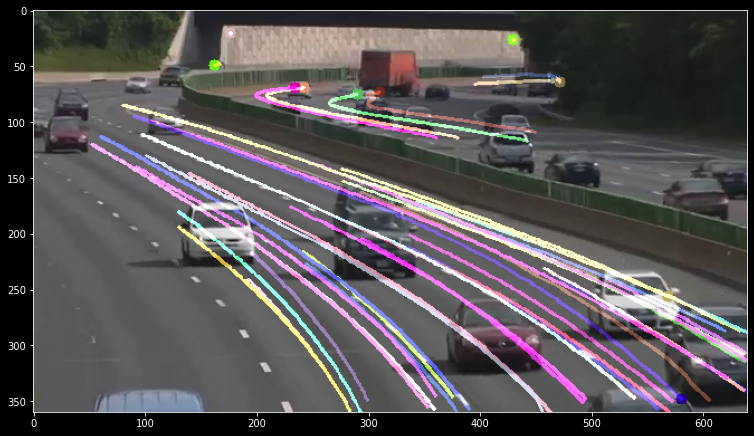

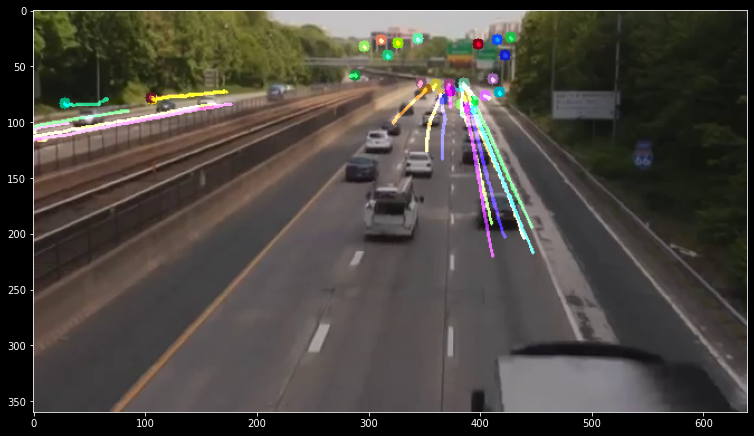

In [275]:
while(True):
    if frame_count == 14*fps:
        break
        
    if frame_count==0 or frame_count==190:
        corners = find_corners(prev_gray)
        mask = np.zeros_like(prev_frame)
        color = np.random.randint(0,255,(len(corners),3))
    
    ret, curr_frame = cap.read()
    curr_gray = gray(curr_frame)
    new_corners, status, err = cv2.calcOpticalFlowPyrLK(prev_gray, curr_gray, corners, None,**lk_params)
    
    for i,(new, old, st) in enumerate(zip(new_corners, corners, status)):
        if st==1:
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
            curr_frame = cv2.circle(curr_frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(curr_frame,mask)
    
    cv2.imshow('frame',img)
    frame_count+=1
        
    prev_gray = curr_gray.copy()
    corners = new_corners.reshape(-1,1,2)
    
    if frame_count==189 or frame_count==346:
        rgb_img = rgb(img)
        plt.imshow(rgb_img)
        plt.show()
    
    cv2.waitKey(fps)
    
cap.release()
cv2.destroyAllWindows()

In [276]:
cap = cv2.VideoCapture('videoplayback.mp4')
cap.set(1, first_frame)
frame_count=0
ret, prev_frame = cap.read()
prev_gray = gray(prev_frame)
mask = np.zeros_like(prev_frame)

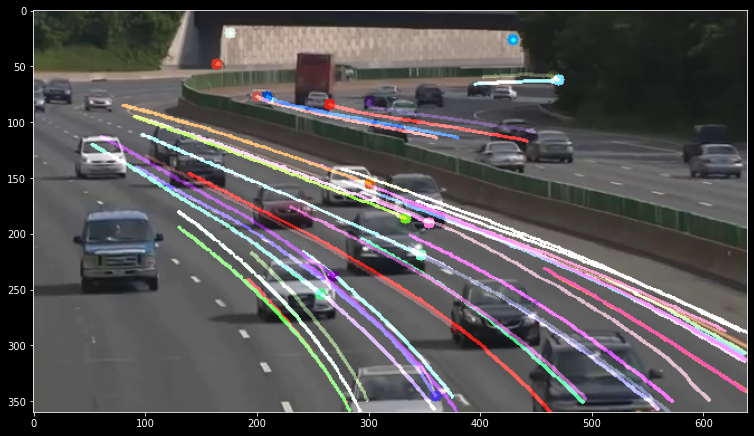

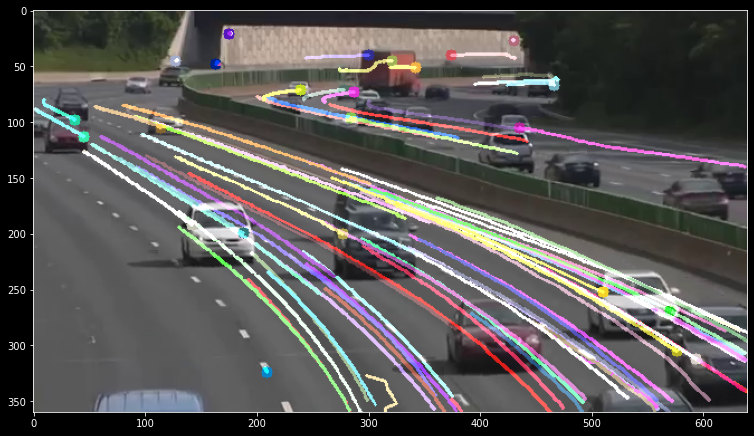

In [277]:
while(True):
    if frame_count == 9*fps:
        break
    
    if frame_count%(5*fps)==0:
        corners = find_corners(prev_gray)
#         mask = np.zeros_like(prev_frame)
        color = np.random.randint(0,255,(len(corners),3))
      
    ret, curr_frame = cap.read()
    curr_gray = gray(curr_frame)
    new_corners, status, err = cv2.calcOpticalFlowPyrLK(prev_gray, curr_gray, corners, None,**lk_params)
    
    for i,(new, old, st) in enumerate(zip(new_corners, corners, status)):
        if st==1:
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
            curr_frame = cv2.circle(curr_frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(curr_frame,mask)
    
    cv2.imshow('frame',img)
    frame_count+=1
        
    prev_gray = curr_gray.copy()
    corners = new_corners.reshape(-1,1,2)
    
    if frame_count==189 or frame_count==5*fps:
        rgb_img = rgb(img)
        plt.imshow(rgb_img)
        plt.show()
    
    k = cv2.waitKey(fps)
    if k == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

# P4:

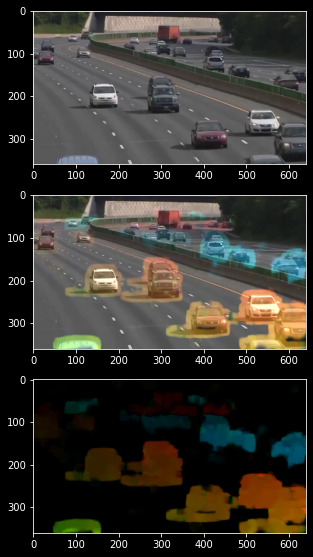

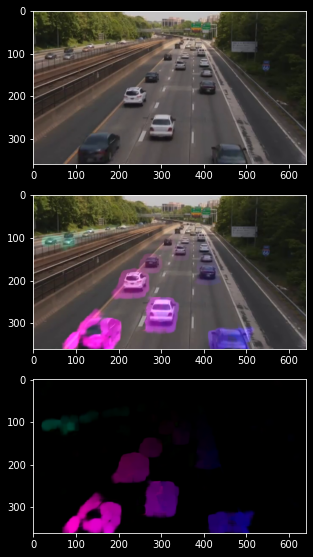

In [21]:
cap.release()
cap = cv2.VideoCapture('videoplayback.mp4')
cap.set(1, first_frame)
ret, old_frame = cap.read()
old_gray = gray(old_frame)
hsv = np.zeros_like(old_frame)
hsv[...,1] = 255
counter = 0
while(True):
    if counter == 14*fps:
        break
    ret, new_frame = cap.read()
    new_gray = gray(new_frame)
    flow = cv2.calcOpticalFlowFarneback(old_gray, new_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = (ang*180/np.pi)/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    img = cv2.add(new_frame,bgr)
    
#     cv2.imshow('frame',img)
#     cv2.imshow('flow',bgr)
        
    old_gray = new_gray.copy()
    
    cv2.waitKey(-1)
    
    if counter==188 or counter==300:
        plt.subplot(3,1,1)
        plt.imshow(rgb(new_frame))
        plt.subplot(3,1,2)
        plt.imshow(rgb(img))
        plt.subplot(3,1,3)
        plt.imshow(rgb(bgr))
        plt.show()
    counter += 1
    
cap.release()
cv2.destroyAllWindows()